In [1]:
import matplotlib.pyplot as plt
from astropy.units import Quantity
import numpy as np
import copy

import mypackage.geometry as geo
import mypackage.transformations as tr

[[2.         1.89473684 1.78947368 1.68421053 1.57894737 1.47368421
  1.36842105 1.26315789 1.15789474 1.05263158 0.94736842 0.84210526
  0.73684211 0.63157895 0.52631579 0.42105263 0.31578947 0.21052632
  0.10526316 0.        ]
 [3.         2.89473684 2.78947368 2.68421053 2.57894737 2.47368421
  2.36842105 2.26315789 2.15789474 2.05263158 1.94736842 1.84210526
  1.73684211 1.63157895 1.52631579 1.42105263 1.31578947 1.21052632
  1.10526316 1.        ]]


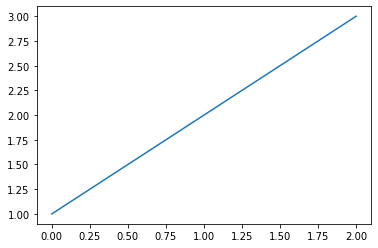

In [2]:
seg = geo.LineSegment([[2,0],[3,1]])
seg_data = seg.rasterize(0.15)
print(seg_data)
plt.plot(seg_data[0], seg_data[1])

In [3]:
# Values for the Single V Groove Butt Weld
# in a dictionary
t = Quantity(0.009,unit="meter")
alpha = Quantity(40, unit="deg")
b = Quantity(0.2, unit="centimeter")
c = Quantity(1, unit="millimeter")
v_naht_dict = dict(t=t, alpha=alpha, b=b, c=c)
width_default = Quantity(5, unit="millimeter")
v_naht_dict

{'t': <Quantity 0.009 m>,
 'alpha': <Quantity 40. deg>,
 'b': <Quantity 0.2 cm>,
 'c': <Quantity 1. mm>}

In [4]:
# V-naht berechnungen und erstellen der einzelnen Teilsegmente
bottom = geo.LineSegment([[-width_default.to_value("millimeter"),0],[0,0]])
root_face = geo.LineSegment([[0,0],[0,v_naht_dict["b"].to_value("millimeter")]])
alpha_halbe = v_naht_dict["alpha"].to_value("deg")/2
s = np.tan(alpha_halbe)
groove_face = geo.LineSegment([[0,-s],[v_naht_dict["b"].to_value("millimeter"),
                                       v_naht_dict["t"].to_value("millimeter")]])
top = geo.LineSegment([[-s, -width_default.to_value("millimeter")],
                         [v_naht_dict["t"].to_value("millimeter"),
                          v_naht_dict["t"].to_value("millimeter")]])

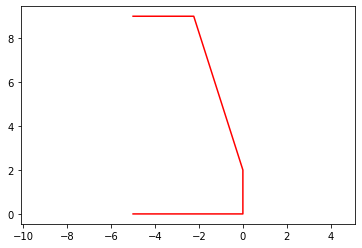

In [5]:
# Segmente zusammenfassen zu shape
segment_list = []
segment_list.append(bottom)
segment_list.append(root_face)
segment_list.append(groove_face)
segment_list.append(top)
shape = geo.Shape(segment_list)

shape_data = shape.rasterize(0.8)

ax = plt.gca()
ax.cla()
ax.axis("equal")

plt.plot(shape_data[0],shape_data[1],"r-")

1.0


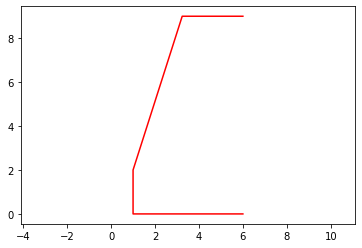

In [6]:
# shape verschieben und verdoppeln
b_halbe = v_naht_dict["b"].to_value("millimeter")/2
print(b_halbe)
shape = shape.translate([-b_halbe, 0])
shape_r = shape.reflect_across_line([0, 0], [0, 1])

shape_r_data = shape_r.rasterize(0.1)

ax = plt.gca()
ax.cla()
ax.axis("equal")

plt.plot(shape_r_data[0],shape_r_data[1],"r-")

In [7]:
# profil erstellen
profile = geo.Profile([shape, shape_r])

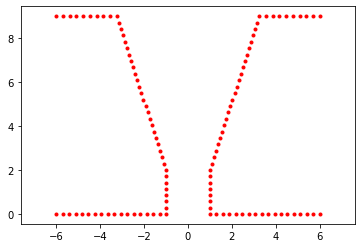

In [11]:
profile_data = profile.rasterize(0.3)
shape_data = shape.rasterize(0.3)
shape_r_data = shape_r.rasterize(0.3)

ax = plt.gca()
ax.cla()
ax.axis("equal")

plt.plot(shape_data[0],shape_data[1],"r.")
plt.plot(shape_r_data[0],shape_r_data[1],"r.")
#plt.plot(profile_data[0],profile_data[1],"--")

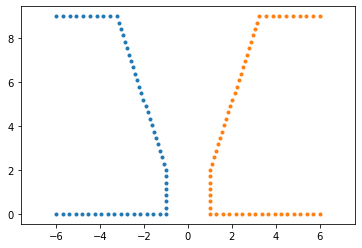

In [12]:
h = len(profile_data[0])//2

ax = plt.gca()
ax.cla()
ax.axis("equal")

plt.plot(profile_data[0][:h],
        profile_data[1][:h], ".")
plt.plot(profile_data[0][h:],
        profile_data[1][h:], ".")

# Loading from file

In [1]:
import matplotlib.pyplot as plt
from mypackage.all_groove import singleVGrooveButtWeld, singleUGrooveButtWeld
from astropy.units import Quantity

In [2]:
# Values for the Single V Groove Butt Weld
# in a dictionary
t = Quantity(0.009,unit="meter")
alpha = Quantity(40, unit="deg")
b = Quantity(0, unit="centimeter")
c = Quantity(1, unit="millimeter")
v_naht_dict = dict(t=t, alpha=alpha, b=b, c=c)

In [3]:
profile = singleVGrooveButtWeld(v_naht_dict)

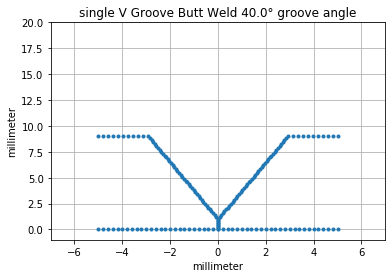

In [4]:
profile_data = profile.rasterize(0.2)

ax = plt.gca()
ax.cla()
#ax.axis("equal")
ax.axis([-7, +7, -1, 20])
ax.grid(True)
ax.set(title="single V Groove Butt Weld {}° groove angle".format(alpha.value), xlabel="millimeter", ylabel="millimeter")

plt.plot(profile_data[0],profile_data[1],".")

In [5]:
# Values for the Single V Groove Butt Weld
# in a dictionary
t = Quantity(0.009,unit="meter")
alpha = Quantity(60, unit="deg")
b = Quantity(0.2, unit="centimeter")
c = Quantity(1, unit="millimeter")
v_naht_dict = dict(t=t, alpha=alpha, b=b, c=c)

In [6]:
profile = singleVGrooveButtWeld(v_naht_dict)

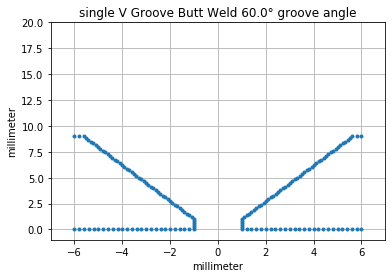

In [7]:
profile_data = profile.rasterize(0.2)

ax = plt.gca()
ax.cla()
#ax.axis("equal")
ax.axis([-7, +7, -1, 20])
#[xmin, xmax, ymin, ymax]
ax.grid(True)
ax.set(title="single V Groove Butt Weld {}° groove angle".format(alpha.value), xlabel="millimeter", ylabel="millimeter")

plt.plot(profile_data[0],profile_data[1],".")

In [8]:
t = Quantity(15, unit="millimeter")
beta = Quantity(9, unit="deg")
R = Quantity(6, unit="millimeter")
b = Quantity(3, unit="millimeter")
c = Quantity(1, unit="millimeter")
u_naht_dict = dict(t=t, beta=beta, R=R, b=b, c=c)

In [9]:
profile = singleUGrooveButtWeld(u_naht_dict)

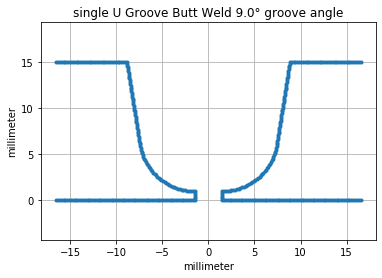

In [10]:
profile_data = profile.rasterize(0.2)

ax = plt.gca()
ax.cla()
ax.axis("equal")
#ax.axis([-7, +7, -1, 20])
#[xmin, xmax, ymin, ymax]
ax.grid(True)
ax.set(title="single U Groove Butt Weld {}° groove angle".format(beta.value), xlabel="millimeter", ylabel="millimeter")

plt.plot(profile_data[0],profile_data[1],".")